# **Tarea: Teoría cuántica básica, Observables y Medidas**

Por: Juan sebastián Fajardo Acevedo

# Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [ ]:
import numpy as np

def normalize_ket(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector ket no puede ser el vector cero.")
    return ket / norm

def probability_of_position(ket):
    return np.abs(ket) ** 2

def transition_probability(ket1, ket2):
    ket1 = normalize_ket(ket1)
    ket2 = normalize_ket(ket2)
    return np.abs(np.vdot(ket1, ket2)) ** 2

# Ejemplo
num_positions = 5  # EL número de posiciones discretas
dim = num_positions

# estado ket inicial
ket1 = np.array([1+0j, 0.5+0.5j, 0, 0.5-0.5j, 1+0j])
ket1 = normalize_ket(ket1)

# Calcular la probabilidad de encontrar la partícula en cada posición
probabilities = probability_of_position(ket1)
print("Probabilidades de encontrar la partícula en cada posición:", probabilities)

# otro estado ket
ket2 = np.array([0, 1, 0, 0, 0])
ket2 = normalize_ket(ket2)

# Calcular la probabilidad de transición del ket1 a ket2
trans_prob = transition_probability(ket1, ket2)
print("Probabilidad de transición de ket1 a ket2:", trans_prob)

Probabilidades de encontrar la partícula en cada posición: [0.33333333 0.16666667 0.         0.16666667 0.33333333]
Probabilidad de transición de ket1 a ket2: 0.1666666666666667


#Complete los retos de programación del capítulo 4.

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [3]:
import numpy as np

# Función para normalizar un vector ket
def normalize_ket(ket):
    """ Normaliza un vector ket dividiendo por su norma. """
    norm = np.linalg.norm(ket)
    return ket / norm if norm != 0 else ket

# Función para calcular la probabilidad de encontrar la partícula en una posición dada
def probability_at_position(ket, position):
    """ Calcula la probabilidad de encontrar la partícula en una posición específica. """
    norm_squared = np.abs(ket) ** 2  # Tomamos el cuadrado del módulo de cada amplitud
    return norm_squared[position] / np.sum(norm_squared)  # Normalizamos para obtener la probabilidad

# Función para calcular la amplitud de transición entre dos estados
def transition_probability(ket1, ket2):
    """ Calcula la probabilidad de transición entre dos estados después de la observación. """
    ket1 = normalize_ket(ket1)
    ket2 = normalize_ket(ket2)
    amplitude = np.vdot(ket1, ket2)  # Producto interno entre los vectores
    return np.abs(amplitude) ** 2  # Tomamos el módulo al cuadrado para obtener la probabilidad

# Función para verificar si una matriz es hermitiana
def is_hermitian(matrix):
    """ Verifica si una matriz es hermitiana comparándola con su traspuesta conjugada. """
    return np.allclose(matrix, matrix.conj().T)

# Función para calcular el valor esperado y la varianza de un observable
def expectation_and_variance(matrix, ket):
    """ Calcula el valor esperado y la varianza de un observable en un estado dado. """
    if not is_hermitian(matrix):
        raise ValueError("La matriz no es hermitiana.")

    ket = normalize_ket(ket)
    expectation_value = np.vdot(ket, matrix @ ket)  # ⟨ψ|O|ψ⟩

    variance = np.vdot(ket, (matrix @ matrix) @ ket) - expectation_value ** 2  # ⟨ψ|O²|ψ⟩ - (⟨ψ|O|ψ⟩)²
    return expectation_value, variance

# Función para calcular autovalores de un observable
def eigenvalues_and_probabilities(matrix, ket):
    """ Calcula los valores propios y la probabilidad de transición a cada eigenestado. """
    if not is_hermitian(matrix):
        raise ValueError("La matriz no es hermitiana.")

    eigenvalues, eigenvectors = np.linalg.eigh(matrix)  # Obtiene valores y vectores propios
    ket = normalize_ket(ket)

    probabilities = np.abs(eigenvectors.T.conj() @ ket) ** 2  # Probabilidades de transición a cada eigenestado
    return eigenvalues, probabilities

# Función para calcular la evolución del estado bajo una secuencia de matrices unitarias
def apply_unitary_evolution(ket, unitary_matrices):
    """ Aplica una secuencia de matrices unitarias a un estado inicial. """
    ket = normalize_ket(ket)

    for U in unitary_matrices:
        if not np.allclose(U.conj().T @ U, np.eye(U.shape[0])):  # Verifica si es unitaria
            raise ValueError("Una de las matrices no es unitaria.")
        ket = U @ ket  # Aplicamos la matriz al estado
    return ket

# ======================= EJEMPLOS =======================

# Definimos un estado inicial
ket = np.array([2 - 1j, 2j, 1 - 1j, 1, -2j, 2])
ket = normalize_ket(ket)  # Normalizamos el ket

# Probabilidad de encontrar la partícula en x3
pos = 3
prob_pos = probability_at_position(ket, pos)
print(f"Ejemplo 1: Probabilidad en la posición {pos} es {prob_pos:.4f}")

# Probabilidad de transición entre dos estados
ket2 = np.array([1j, 1, 0, 0, -1j, 2])
prob_trans = transition_probability(ket, ket2)
print(f"Ejemplo 2: Probabilidad de transición entre ket1 y ket2 es {prob_trans:.4f}")

# Definimos un observable hermitiano
observable = np.array([[3, 1j, 0], [-1j, 2, 1], [0, 1, 1]])

# Comprobamos si es hermitiano
hermitian_check = is_hermitian(observable)
print(f"Ejemplo 3: ¿El observable es hermitiano? {hermitian_check}")

# Calculamos el valor esperado y la varianza
expect_val, var = expectation_and_variance(observable, ket[:3])  # Usamos solo las 3 primeras componentes
print(f"Ejemplo 4: Valor esperado = {expect_val:.4f}, Varianza = {var:.4f}")

# Calculamos autovalores y probabilidades
eigvals, probs = eigenvalues_and_probabilities(observable, ket[:3])
print(f"Ejemplo 5: Autovalores del observable: {eigvals}")
print(f"Ejemplo 6: Probabilidades de cada eigenestado: {probs}")

# Aplicamos la evolución con matrices unitarias
U1 = np.array([[1, 0, 0], [0, np.exp(1j * np.pi / 4), 0], [0, 0, np.exp(-1j * np.pi / 4)]])
U2 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
final_state = apply_unitary_evolution(ket[:3], [U1, U2])
print(f"Ejemplo 7: Estado final tras evolución unitaria: {final_state}")



Ejemplo 1: Probabilidad en la posición 3 es 0.0500
Ejemplo 2: Probabilidad de transición entre ket1 y ket2 es 0.1786
Ejemplo 3: ¿El observable es hermitiano? True
Ejemplo 4: Valor esperado = 1.1818+0.0000j, Varianza = 1.1488+0.0000j
Ejemplo 5: Autovalores del observable: [0.26794919 2.         3.73205081]
Ejemplo 6: Probabilidades de cada eigenestado: [0.53921905 0.39393939 0.06684156]
Ejemplo 7: Estado final tras evolución unitaria: [-4.26401433e-01+0.42640143j  6.03022689e-01-0.30151134j
  2.77555756e-17-0.42640143j]


# Realice los siguientes problemas e incluyalos como ejemplos

Modele en su librería los problemas

4.3.1

4.3.2

4.4.1

4.4.2

Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3


Ejercicio 4.3.1: Probabilidades de transición y valor esperado
Probabilidades: [Abs(c0)**2, Abs(c1)**2, Abs(c2)**2, Abs(c3)**2]
Valor Esperado: lambda0*Abs(c0)**2 + lambda1*Abs(c1)**2 + lambda2*Abs(c2)**2 + lambda3*Abs(c3)**2

Ejercicio 4.3.2: Probabilidades de transición y valor esperado
Distribución de probabilidades:
(\lambda_0, c0**2)
(\lambda_1, c1**2)
(\lambda_2, c2**2)
Valor medio: \lambda_0*c0**2 + \lambda_1*c1**2 + \lambda_2*c2**2


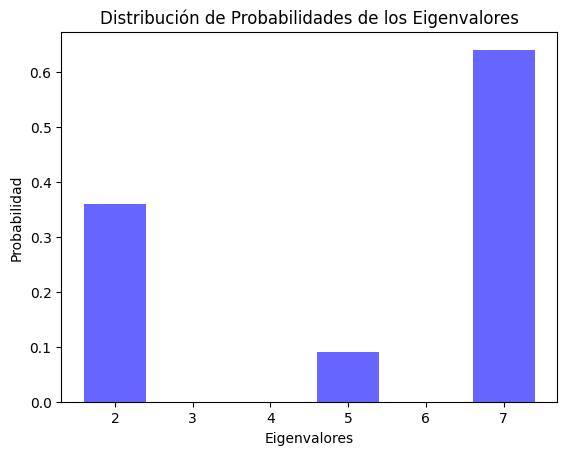


Ejercicio 4.4.1: Verificación de matrices unitarias
U1 * U1^H: Matrix([[1, 0], [0, 1]])
U2 * U2^H: Matrix([[1, 0], [0, 1]])
(U1 * U2) * (U1 * U2)^H: Matrix([[1, 0], [0, 1]])

Ejercicio 4.4.2: Evolución del estado cuántico
Estado después de 1 paso: Matrix([[0], [sqrt(2)/2], [0], [sqrt(2)/2]])
Estado después de 2 pasos: Matrix([[1/2], [I/2], [1/2], [I/2]])
Estado después de 3 pasos: Matrix([[sqrt(2)/4 + sqrt(2)*I/4], [0], [-sqrt(2)/4 + sqrt(2)*I/4], [0]])
Probabilidad de estar en la posición 3: 1/4


In [8]:
from sympy import Matrix, symbols, I, sqrt

# Ejercicio 4.3.1: Cálculo de las probabilidades de transición
psi_coeffs = symbols('c0 c1 c2 c3')  # Coeficientes en la base ortonormal
eigenvalues = symbols('lambda0 lambda1 lambda2 lambda3')  # Valores propios
probabilities = [abs(psi_coeffs[i])**2 for i in range(4)]
mean_value = sum(probabilities[i] * eigenvalues[i] for i in range(4))
print("\nEjercicio 4.3.1: Probabilidades de transición y valor esperado")
print("Probabilidades:", probabilities)
print("Valor Esperado:", mean_value)

# Ejercicio 4.3.2: Cálculo de las probabilidades de transición
c0, c1, c2 = sp.symbols('c0 c1 c2', real=True) # Definimos los coeficientes de la superposición |ψ> en la base de los eigenvectores
lambda_vals = [sp.symbols('\lambda_0'), sp.symbols('\lambda_1'), sp.symbols('\lambda_2')] # Eigenvalores y eigenvectores
p_vals = [c0**2, c1**2, c2**2]  # Probabilidades de colapso en cada eigenvector
mean_value = sum(p_vals[i] * lambda_vals[i] for i in range(len(lambda_vals))) # Calculamos la media de la distribución
print("\nEjercicio 4.3.2: Probabilidades de transición y valor esperado")
print("Distribución de probabilidades:")  # Imprimimos resultados algebraicos
for i in range(len(lambda_vals)):
    print(f"({lambda_vals[i]}, {p_vals[i]})")
print(f"Valor medio: {mean_value}")
# Asignamos valores numéricos a los coeficientes para graficar
c0_val, c1_val, c2_val = 0.6, 0.3, 0.8  # Ejemplo de valores normalizados
lambda_num = [2, 5, 7]  # Valores de eigenvalores
p_num = [c0_val**2, c1_val**2, c2_val**2]
# Graficamos la distribución de probabilidades
plt.bar(lambda_num, p_num, color='blue', alpha=0.6)
plt.xlabel("Eigenvalores")
plt.ylabel("Probabilidad")
plt.title("Distribución de Probabilidades de los Eigenvalores")
plt.show()


# Ejercicio 4.4.1: Verificación de matrices unitarias
U1 = Matrix([[0, 1], [1, 0]])
U2 = Matrix([[sqrt(2)/2, sqrt(2)/2], [sqrt(2)/2, -sqrt(2)/2]])
U1_conjugate = U1.H  # Transpuesta conjugada
U2_conjugate = U2.H
product_U1 = U1 * U1_conjugate
product_U2 = U2 * U2_conjugate
U_product = U1 * U2
U_product_conjugate = U_product.H
print("\nEjercicio 4.4.1: Verificación de matrices unitarias")
print("U1 * U1^H:", product_U1)
print("U2 * U2^H:", product_U2)
print("(U1 * U2) * (U1 * U2)^H:", U_product * U_product_conjugate)

# Ejercicio 4.4.2: Evolución del estado cuántico
U_new = Matrix([
    [0, 1/sqrt(2), 1/sqrt(2), 0],
    [1/sqrt(2), 0, 0, I/sqrt(2)],
    [0, 1/sqrt(2), -1/sqrt(2), 0],
    [1/sqrt(2), 0, 0, I/sqrt(2)]
])
psi_initial = Matrix([1, 0, 0, 0])
psi_t1 = U_new * psi_initial
psi_t2 = U_new * psi_t1
psi_t3 = U_new * psi_t2
print("\nEjercicio 4.4.2: Evolución del estado cuántico")
print("Estado después de 1 paso:", psi_t1)
print("Estado después de 2 pasos:", psi_t2)
print("Estado después de 3 pasos:", psi_t3)

# Probabilidad de encontrar la partícula en la posición 3 (índice 2)
prob_position_3 = abs(psi_t3[2])**2
print("Probabilidad de estar en la posición 3:", prob_position_3)


# Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3


In [10]:
import numpy as np

# Ejercicio 4.5.2 - Representación de estados de dos partículas con spin
# Estados base de una partícula con spin
up = np.array([[1], [0]])   # |↑⟩
down = np.array([[0], [1]]) # |↓⟩

# Producto tensorial para dos partículas
up_up = np.kron(up, up)
up_down = np.kron(up, down)
down_up = np.kron(down, up)
down_down = np.kron(down, down)

# Imprimimos los estados básicos del sistema de dos partículas
print("Estados base del sistema de dos partículas:")
print("|↑↑⟩ =", up_up.T)
print("|↑↓⟩ =", up_down.T)
print("|↓↑⟩ =", down_up.T)
print("|↓↓⟩ =", down_down.T)

# Generalización a n partículas
# Para n partículas, los estados básicos se construyen de manera similar

# Ejercicio 4.5.3 - Verificación de separabilidad de un estado cuántico
# Estado dado: |φ⟩ = |x0⟩⊗|y1⟩ + |x1⟩⊗|y1⟩
phi = up_down + down_up

# Imprimimos el estado combinado
print("\nEstado cuántico |φ⟩:")
print(phi.T)

# Verificación de separabilidad con descomposición en valores singulares (SVD)
phi_matrix = phi.reshape(2, 2)  # Reestructuramos a una matriz 2x2
U, S, Vh = np.linalg.svd(phi_matrix)  # Descomposición SVD

print("\nValores singulares:", S)
if np.count_nonzero(S > 1e-10) == 1:
    print("El estado es separable.")
else:
    print("El estado es entrelazado.")


Estados base del sistema de dos partículas:
|↑↑⟩ = [[1 0 0 0]]
|↑↓⟩ = [[0 1 0 0]]
|↓↑⟩ = [[0 0 1 0]]
|↓↓⟩ = [[0 0 0 1]]

Estado cuántico |φ⟩:
[[0 1 1 0]]

Valores singulares: [1. 1.]
El estado es entrelazado.


Un estado cuántico es separable si puede escribirse como el producto tensorial de dos estados individuales.
Si tiene más de un valor singular distinto de cero, significa que no se puede escribir como un producto de estados individuales, lo que indica que el sistema está entrelazado. En este caso, el estado |φ⟩ está entrelazado porque sus coeficientes no permiten una separación simple en términos de los estados base del sistema.